# Produisez une etude de marche dans le secteur Agroalimentaire

## Initialisations

### Import & Config

In [1]:
import sys
import os
import pylab
import pandas as pd
import numpy as np
import seaborn as sns
import scipy as sp
import math as mat
from functions import *
import matplotlib.pyplot as plt
from sklearn import preprocessing, decomposition
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.stats import ks_2samp
from scipy import stats

### Premiere variable : population entre une année antérieure (au choix) et l'année courante, exprimée en pourcentage

In [2]:
population = pd.read_csv("P5_csv/pop_2008_2018.csv")
population.head(5)

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2008,2008,1000 personnes,27722.276,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2018,2018,1000 personnes,37171.921,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,202,Afrique du Sud,511,Population totale,3010,Population-Estimations,2008,2008,1000 personnes,49779.471,X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,202,Afrique du Sud,511,Population totale,3010,Population-Estimations,2018,2018,1000 personnes,57792.518,X,Sources internationales sûres,NaN
4,OA,Séries temporelles annuelles,3,Albanie,511,Population totale,3010,Population-Estimations,2008,2008,1000 personnes,3002.678,X,Sources internationales sûres,NaN


In [3]:
col_mult = ["Valeur"]
for elt in col_mult:
    population[elt] *= 1000

population.head(5)

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2008,2008,1000 personnes,27722276.0,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2018,2018,1000 personnes,37171921.0,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,202,Afrique du Sud,511,Population totale,3010,Population-Estimations,2008,2008,1000 personnes,49779471.0,X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,202,Afrique du Sud,511,Population totale,3010,Population-Estimations,2018,2018,1000 personnes,57792518.0,X,Sources internationales sûres,NaN
4,OA,Séries temporelles annuelles,3,Albanie,511,Population totale,3010,Population-Estimations,2008,2008,1000 personnes,3002678.0,X,Sources internationales sûres,NaN


In [4]:
population_total = population.pivot_table(index=["Zone","Code zone"], columns = ["Année"], values=["Valeur"])

In [5]:
population_total = population_total.reset_index()

In [6]:
# calcul du ratio d'evolution entre les deux annees en %
population_total["ratio_evol_pop"]=round(((population_total[("Valeur", 2018)] - population_total[("Valeur", 2008)]) / population_total[("Valeur", 2008)]) * 100,1)

In [7]:
# mise en place des colonnes
population_total.columns = ["Zone", "Code zone", "2008", "2018", "ratio_evol_pop"]

In [8]:
population_total = population_total.reset_index()

In [9]:
population_total.head(5)

,index,Zone,Code zone,2008,2018,ratio_evol_pop
0,0,Afghanistan,2,27722276.0,37171921.0,34.1
1,1,Afrique du Sud,202,49779471.0,57792518.0,16.1
2,2,Albanie,3,3002678.0,2882740.0,-4.0
3,3,Algérie,4,34730608.0,42228408.0,21.6
4,4,Allemagne,79,81065752.0,83124418.0,2.5


In [10]:
population_total.shape

(237, 6)

### Deuxieme Variable : proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays

In [11]:
animal = pd.read_csv("P5_csv/animal_2017.csv")
animal.head(5)

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2731,Viande de Bovins,2017,2017,Milliers de tonnes,128.0,Im,Données de la FAO basées sur une méthodologie ...
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2731,Viande de Bovins,2017,2017,Milliers de tonnes,6.0,Im,Données de la FAO basées sur une méthodologie ...
2,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2731,Viande de Bovins,2017,2017,Milliers de tonnes,-1.0,Im,Données de la FAO basées sur une méthodologie ...
3,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5911,Exportations - Quantité,2731,Viande de Bovins,2017,2017,Milliers de tonnes,0.0,Im,Données de la FAO basées sur une méthodologie ...
4,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2731,Viande de Bovins,2017,2017,Milliers de tonnes,136.0,S,Données standardisées


In [12]:
vegetal = pd.read_csv("P5_csv/vegetal_2017.csv")
vegetal.head(5)

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,4281.0,Im,Données de la FAO basées sur une méthodologie ...
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,3080.0,Im,Données de la FAO basées sur une méthodologie ...
2,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2511,Blé et produits,2017,2017,Milliers de tonnes,32.0,Im,Données de la FAO basées sur une méthodologie ...
3,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5911,Exportations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,2.0,Im,Données de la FAO basées sur une méthodologie ...
4,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2511,Blé et produits,2017,2017,Milliers de tonnes,7326.0,S,Données standardisées


In [13]:
# Ajout de la variable origin
animal["origin"] = "Animal"
vegetal["origin"] = "Vegetal"

# On regroupe animal et vegetal en un unique dataframe, grace a une union
temp = animal.append(vegetal)

# Suppression de animal et vegetal
del animal, vegetal

# Transformation de temp en table pivot
data = temp.pivot_table(index=["Zone","Produit","origin", "Année"], columns = ["Élément"], values=["Valeur"], aggfunc=sum)

data.columns = ['Production', 'Importations - Quantité', 'Variation de stock',
       'Exportations - Quantité', 'Disponibilité intérieure', 'Aliments pour animaux', 'Semences',
       'Pertes', 'Traitement', 'Autres utilisations (non alimentaire)', 'Nourriture', 'Alimentation pour touristes', 'Résidus', 
       'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'Disponibilité de matière grasse en quantité (g/personne/jour)']

data = data.reset_index()

# Passage des valeurs "milier de tonnes" avec la bonne unites
col_mult = ["Production", "Importations - Quantité", "Variation de stock", "Exportations - Quantité", "Disponibilité intérieure", "Aliments pour animaux", "Alimentation pour touristes", "Traitement", "Nourriture", "Semences", "Pertes", "Résidus", "Autres utilisations (non alimentaire)"]

for elt in col_mult:
    data[elt] *= 1000000
    
data.head(5)

,Zone,Produit,origin,Année,Production,Importations - Quantité,Variation de stock,Exportations - Quantité,Disponibilité intérieure,Aliments pour animaux,...,Pertes,Traitement,Autres utilisations (non alimentaire),Nourriture,Alimentation pour touristes,Résidus,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité de matière grasse en quantité (g/personne/jour)
0,Afghanistan,Abats Comestible,Animal,2017,NaN,NaN,NaN,5000000.0,1600000.0,190000.0,...,61000000.0,NaN,6000000.0,58000000.0,3000000.0,55000000.0,0.0,NaN,0.0,NaN
1,Afghanistan,"Agrumes, Autres",Vegetal,2017,NaN,NaN,NaN,1000000.0,1360000.0,10000.0,...,51000000.0,0.0,33000000.0,49000000.0,2000000.0,18000000.0,0.0,NaN,0.0,0.0
2,Afghanistan,"Alcool, non Comestible",Vegetal,2017,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN
3,Afghanistan,Aliments pour enfants,Vegetal,2017,NaN,NaN,NaN,1000000.0,60000.0,0.0,...,2000000.0,NaN,4000000.0,2000000.0,NaN,NaN,0.0,NaN,NaN,1.0
4,Afghanistan,Ananas et produits,Vegetal,2017,NaN,NaN,NaN,0.0,20000.0,0.0,...,1000000.0,0.0,1000000.0,1000000.0,NaN,0.0,0.0,NaN,0.0,0.0


In [14]:
data.shape

(16314, 21)

16314 lignes pour 17 colonnes

In [15]:
# Préparation pour merge population
population_ = population_total[["Zone","Code zone","2008", "2018", "ratio_evol_pop"]]

# Merge data & population_
bilan = pd.merge(data,population_,left_on= "Zone", right_on= "Zone")

bilan.head(5)

,Zone,Produit,origin,Année,Production,Importations - Quantité,Variation de stock,Exportations - Quantité,Disponibilité intérieure,Aliments pour animaux,...,Alimentation pour touristes,Résidus,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité de matière grasse en quantité (g/personne/jour),Code zone,2008,2018,ratio_evol_pop
0,Afghanistan,Abats Comestible,Animal,2017,NaN,NaN,NaN,5000000.0,1600000.0,190000.0,...,3000000.0,55000000.0,0.0,NaN,0.0,NaN,2,27722276.0,37171921.0,34.1
1,Afghanistan,"Agrumes, Autres",Vegetal,2017,NaN,NaN,NaN,1000000.0,1360000.0,10000.0,...,2000000.0,18000000.0,0.0,NaN,0.0,0.0,2,27722276.0,37171921.0,34.1
2,Afghanistan,"Alcool, non Comestible",Vegetal,2017,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,NaN,NaN,NaN,2,27722276.0,37171921.0,34.1
3,Afghanistan,Aliments pour enfants,Vegetal,2017,NaN,NaN,NaN,1000000.0,60000.0,0.0,...,NaN,NaN,0.0,NaN,NaN,1.0,2,27722276.0,37171921.0,34.1
4,Afghanistan,Ananas et produits,Vegetal,2017,NaN,NaN,NaN,0.0,20000.0,0.0,...,NaN,0.0,0.0,NaN,0.0,0.0,2,27722276.0,37171921.0,34.1


In [16]:
bilan.shape

(16258, 25)

16249 lignes pour 21 colonnes

In [17]:
print(pd.isnull(bilan).sum())

Zone                                                                 0
Produit                                                              0
origin                                                               0
Année                                                                0
Production                                                       13459
Importations - Quantité                                          12303
Variation de stock                                               10781
Exportations - Quantité                                           1623
Disponibilité intérieure                                          1505
Aliments pour animaux                                             1602
Semences                                                          1602
Pertes                                                               0
Traitement                                                        3823
Autres utilisations (non alimentaire)                              739
Nourri

In [18]:
# Remplacer les valeurs inconnues par la moyenne de la variable
bilan = bilan.fillna(bilan.mean())

In [19]:
# Calcul de la disponibilité alimentaire
bilan["dispo_alim"] = bilan["Aliments pour animaux"]+bilan["Nourriture"]

In [20]:
bilan.head(5)

,Zone,Produit,origin,Année,Production,Importations - Quantité,Variation de stock,Exportations - Quantité,Disponibilité intérieure,Aliments pour animaux,...,Résidus,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité de matière grasse en quantité (g/personne/jour),Code zone,2008,2018,ratio_evol_pop,dispo_alim
0,Afghanistan,Abats Comestible,Animal,2017,1.262951e+06,3.530108e+08,1.653094e+08,5.000000e+06,1.600000e+06,1.900000e+05,...,5.500000e+07,0.0,82.804022,0.000000,15.005179,2,27722276.0,37171921.0,34.1,5.819000e+07
1,Afghanistan,"Agrumes, Autres",Vegetal,2017,1.262951e+06,3.530108e+08,1.653094e+08,1.000000e+06,1.360000e+06,1.000000e+04,...,1.800000e+07,0.0,82.804022,0.000000,0.000000,2,27722276.0,37171921.0,34.1,4.901000e+07
2,Afghanistan,"Alcool, non Comestible",Vegetal,2017,1.262951e+06,3.530108e+08,1.653094e+08,3.384838e+07,7.979486e+06,1.043172e+06,...,0.000000e+00,0.0,82.804022,535.772338,15.005179,2,27722276.0,37171921.0,34.1,3.522752e+08
3,Afghanistan,Aliments pour enfants,Vegetal,2017,1.262951e+06,3.530108e+08,1.653094e+08,1.000000e+06,6.000000e+04,0.000000e+00,...,1.025647e+09,0.0,82.804022,535.772338,1.000000,2,27722276.0,37171921.0,34.1,2.000000e+06
4,Afghanistan,Ananas et produits,Vegetal,2017,1.262951e+06,3.530108e+08,1.653094e+08,0.000000e+00,2.000000e+04,0.000000e+00,...,0.000000e+00,0.0,82.804022,0.000000,0.000000,2,27722276.0,37171921.0,34.1,1.000000e+06


In [21]:
# Regroupement de bilan par zones et origines
bilan_groupby = bilan.groupby(["Zone", "origin"]).sum()
bilan_groupby = bilan_groupby.reset_index()

In [22]:
bilan_groupby.head(5)

,Zone,origin,Année,Production,Importations - Quantité,Variation de stock,Exportations - Quantité,Disponibilité intérieure,Aliments pour animaux,Semences,...,Résidus,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité de matière grasse en quantité (g/personne/jour),Code zone,2008,2018,ratio_evol_pop,dispo_alim
0,Afghanistan,Animal,24204,1.515541e+07,3.896118e+09,1.818403e+09,1.940000e+08,5.270000e+07,1.346000e+07,1.114000e+07,...,2.567000e+09,-0.478569,913.844247,2873.089353,89.031074,24,3.326673e+08,4.460631e+08,409.2,1.926460e+09
1,Afghanistan,Vegetal,151275,9.472133e+07,2.050060e+10,1.202228e+10,2.361726e+09,3.890343e+08,3.248441e+07,5.853323e+07,...,1.925747e+10,69.000000,5723.457435,7594.812736,1288.108758,150,2.079171e+09,2.787894e+09,2557.5,1.483404e+10
2,Afrique du Sud,Animal,44374,2.778492e+07,5.698401e+09,1.541145e+09,4.650000e+08,1.291900e+08,3.280000e+07,3.530000e+07,...,8.156050e+09,-119.264264,1800.884471,11601.219104,96.041074,4444,1.095148e+09,1.271435e+09,354.2,7.395900e+09
3,Afrique du Sud,Vegetal,147241,9.219543e+07,2.435654e+10,1.064856e+10,2.739787e+09,4.756359e+08,5.807538e+07,5.603041e+07,...,7.603336e+10,-487.000000,4702.221234,44204.755224,3316.020716,14746,3.633901e+09,4.218854e+09,1175.3,2.634393e+10
4,Albanie,Animal,44374,2.778492e+07,7.130385e+09,1.487784e+09,1.043000e+09,3.942000e+08,7.102000e+07,6.407000e+07,...,4.409642e+09,-16.264264,1738.884471,11345.219104,150.051790,66,6.605892e+07,6.342028e+07,-88.0,1.207920e+09


In [23]:
# table_pivot disponibilité alimentaire en proteine selon orgine par pays
bilan_proteines = bilan_groupby.pivot_table(
    index=["Zone"],
    columns = ["origin"], values=["Disponibilité de protéines en quantité (g/personne/jour)"])

bilan_proteines.columns = ["Disponibilité de protéines en quantité animal", "Disponibilité de protéines en quantité vegetal"]

bilan_proteines = bilan_proteines.reset_index()

# Calcul du ratio proteine animal
bilan_proteines["ratio_protein_anim"] = round((bilan_proteines["Disponibilité de protéines en quantité animal"] / (bilan_proteines["Disponibilité de protéines en quantité vegetal"] + bilan_proteines["Disponibilité de protéines en quantité animal"])) * 100,1)

# Affichage des 20 pays au plus fort ratio
bilan_proteines.sort_values(["ratio_protein_anim"], axis=0, ascending=False, inplace=True)
bilan_proteines = bilan_proteines.reset_index()
bilan_proteines.head(20)[["Zone","ratio_protein_anim"]]

,Zone,ratio_protein_anim
0,Yémen,52.0
1,République populaire démocratique de Corée,48.1
2,Rwanda,48.0
3,Congo,47.9
4,Niger,46.6
5,Tchad,46.3
6,Sénégal,45.5
7,Cambodge,44.6
8,Haïti,44.1
9,Guinée,43.9


### Troisieme Varaible & Quatrieme : disponibilité alimentaire en protéines par habitant & disponibilité alimentaire en calories par habitant.

In [24]:
dispo = bilan.groupby(["Zone"]).sum()

In [25]:
dispo.head(5)

,Année,Production,Importations - Quantité,Variation de stock,Exportations - Quantité,Disponibilité intérieure,Aliments pour animaux,Semences,Pertes,Traitement,...,Résidus,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité de matière grasse en quantité (g/personne/jour),Code zone,2008,2018,ratio_evol_pop,dispo_alim
Zone,,,,,,,,,,,,,,,,,,,,,
Afghanistan,175479,1.098767e+08,2.439672e+10,1.384068e+10,2.555726e+09,4.417343e+08,4.594441e+07,6.967323e+07,1.616500e+10,4.501870e+09,...,2.182447e+10,68.521431,6637.301682,10467.902090,1377.139832,174,2.411838e+09,3.233957e+09,2966.7,1.676050e+10
Afrique du Sud,191615,1.199804e+08,3.005494e+10,1.218971e+10,3.204787e+09,6.048259e+08,9.087538e+07,9.133041e+07,6.183900e+10,1.142787e+10,...,8.418941e+10,-606.264264,6503.105705,55805.974328,3412.061790,19190,4.729050e+09,5.490289e+09,1529.5,3.373983e+10
Albanie,185564,1.161915e+08,2.644695e+10,9.914254e+09,3.862877e+09,1.289003e+09,1.328544e+08,1.316132e+08,4.885070e+09,3.787963e+09,...,2.987688e+10,-17.264264,6680.321794,35070.201990,184.077685,276,2.762464e+08,2.652121e+08,-368.0,8.445003e+09
Algérie,183547,1.149285e+08,3.161382e+10,1.251015e+10,3.576939e+09,8.142964e+08,8.746220e+07,9.955661e+07,4.340471e+10,3.745395e+09,...,4.999807e+10,366.735736,6635.105705,35847.201990,1558.082864,364,3.160485e+09,3.842785e+09,1965.6,3.393775e+10
Allemagne,191615,1.199804e+08,5.097289e+10,1.510418e+10,3.815787e+09,9.053959e+08,1.543054e+08,1.115304e+08,1.752650e+11,5.198962e+10,...,1.946269e+11,-667.264264,8432.929839,94154.023284,3910.072148,7505,7.701246e+09,7.896820e+09,237.5,7.255449e+10


In [26]:
dispo.columns = ['Code zone', 'Année', 'Production',
       'Importations - Quantité', 'Variation de stock',
       'Exportations - Quantité', 'Disponibilité intérieure',
       'Aliments pour animaux', 'Semences', 'Pertes', 'Traitement',
       'Autres utilisations (non alimentaire)', 'Nourriture',
       'Alimentation pour touristes', 'Résidus',
       'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'Disponibilité de matière grasse en quantité (g/personne/jour)',
       '2008', '2018', 'ratio_evol', 'dispo_alim']

dispo = dispo.reset_index()

In [27]:
dispo = dispo[["Zone","Disponibilité alimentaire (Kcal/personne/jour)","Disponibilité de protéines en quantité (g/personne/jour)"]]
dispo.head(5)

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour)
0,Afghanistan,10467.902090,1377.139832
1,Afrique du Sud,55805.974328,3412.061790
2,Albanie,35070.201990,184.077685
3,Algérie,35847.201990,1558.082864
4,Allemagne,94154.023284,3910.072148


In [28]:
# Préparation merge population_ & food
population_ = population_total[["Zone","Code zone","ratio_evol_pop"]]

# Merge population_ & food
data = pd.merge(dispo,population_,left_on="Zone", right_on="Zone")

data.head(5)

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Code zone,ratio_evol_pop
0,Afghanistan,10467.902090,1377.139832,2,34.1
1,Afrique du Sud,55805.974328,3412.061790,202,16.1
2,Albanie,35070.201990,184.077685,3,-4.0
3,Algérie,35847.201990,1558.082864,4,21.6
4,Allemagne,94154.023284,3910.072148,79,2.5


In [29]:
# Préparation merge data & bilan_proteines
bilan_proteines=bilan_proteines[["Zone","ratio_protein_anim"]]

# merge data & bilan_proteines
data = pd.merge(data,bilan_proteines,left_on="Zone", right_on="Zone")

data.set_index("Zone",inplace=True)

data.head(5)

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Code zone,ratio_evol_pop,ratio_protein_anim
Zone,,,,,
Afghanistan,10467.902090,1377.139832,2,34.1,27.4
Afrique du Sud,55805.974328,3412.061790,202,16.1,20.8
Albanie,35070.201990,184.077685,3,-4.0,32.4
Algérie,35847.201990,1558.082864,4,21.6,30.2
Allemagne,94154.023284,3910.072148,79,2.5,24.5


In [30]:
# Recherche de valeur nulles
print(pd.isnull(data).sum())

Disponibilité alimentaire (Kcal/personne/jour)              0
Disponibilité de protéines en quantité (g/personne/jour)    0
Code zone                                                   0
ratio_evol_pop                                              2
ratio_protein_anim                                          4
dtype: int64


In [31]:
print(data.loc[pd.isna(data["ratio_protein_anim"]), :].index)

Index(['Antilles néerlandaises (ex)', 'Comores', 'Seychelles', 'Soudan (ex)'], dtype='object', name='Zone')


* 3 valeurs nulles dans ratio_protein_anim
* Antilles néerlandaises (ex), Comores, Seychelles
* Imputation par la moyenne 

In [32]:
data = data.fillna(data.mean())

In [33]:
# Recherche de valeur nulles (2)
print(pd.isnull(data).sum())

Disponibilité alimentaire (Kcal/personne/jour)              0
Disponibilité de protéines en quantité (g/personne/jour)    0
Code zone                                                   0
ratio_evol_pop                                              0
ratio_protein_anim                                          0
dtype: int64


In [34]:
# Copy des données complètes 
data_copy = data.copy()
data_copy.columns = ["Disponibilité alimentaire (Kcal/personne/jour)","Disponibilité de protéines en quantité (g/personne/jour)", "Code zone","ratio_evol_pop","ratio_protein_anim"]

In [35]:
data_copy.shape

(177, 5)

176 lignes pour 5 colonnes

### Quatrieme variable : PIB

In [36]:
pib = pd.read_csv("P5_csv/pib.csv")

In [37]:
col_mult = ["Valeur"]
for elt in col_mult:
    pib[elt] *= 1000000

pib.head(5)

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,MK,Indicateurs macro,2,Afghanistan,6110,Valeur (US $),22008,Produit Intérieur Brut,2017,2017,millions,2.151550e+10,X,Sources internationales sûres,Data from UNSD AMA
1,MK,Indicateurs macro,2,Afghanistan,6110,Valeur (US $),22008,Produit Intérieur Brut,2018,2018,millions,2.051388e+10,X,Sources internationales sûres,Data from UNSD AMA
2,MK,Indicateurs macro,202,Afrique du Sud,6110,Valeur (US $),22008,Produit Intérieur Brut,2017,2017,millions,3.490067e+11,X,Sources internationales sûres,Data from UNSD AMA
3,MK,Indicateurs macro,202,Afrique du Sud,6110,Valeur (US $),22008,Produit Intérieur Brut,2018,2018,millions,3.680939e+11,X,Sources internationales sûres,Data from UNSD AMA
4,MK,Indicateurs macro,3,Albanie,6110,Valeur (US $),22008,Produit Intérieur Brut,2017,2017,millions,1.302507e+10,X,Sources internationales sûres,Data from UNSD AMA


In [38]:
pib_complet = pib.pivot_table(index=["Zone", "Code zone"], columns=["Année"], values=["Valeur"])

In [39]:
pib_complet = pib_complet.reset_index()

In [40]:
pib_complet.head(5)

Zone Code zone        Valeur              
Année                                    2017          2018
0         Afghanistan         2  2.151550e+10  2.051388e+10
1      Afrique du Sud       202  3.490067e+11  3.680939e+11
2             Albanie         3  1.302507e+10  1.505888e+10
3             Algérie         4  1.673899e+11  1.737575e+11
4           Allemagne        79  3.665804e+12  3.949549e+12

In [41]:
pib_complet.columns = ["Zone", "Code zone", "2017", "2018"]

In [42]:
pib_complet = pib_complet.reset_index()

In [43]:
pib_complet.head(5)

,index,Zone,Code zone,2017,2018
0,0,Afghanistan,2,2.151550e+10,2.051388e+10
1,1,Afrique du Sud,202,3.490067e+11,3.680939e+11
2,2,Albanie,3,1.302507e+10,1.505888e+10
3,3,Algérie,4,1.673899e+11,1.737575e+11
4,4,Allemagne,79,3.665804e+12,3.949549e+12


### Cinquieme Variable : PIB par habitant

In [44]:
pib_hab = pd.read_csv("P5_csv/pib_habitant.csv")

In [45]:
pib_hab.head(5)

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,MK,Indicateurs macro,2,Afghanistan,6119,Valeur (US $),22014,Produit intérieur brut par habitant,2017,2017,NaN,605.557362,Fc,Donnée calculée,NaN
1,MK,Indicateurs macro,2,Afghanistan,6119,Valeur (US $),22014,Produit intérieur brut par habitant,2018,2018,NaN,563.983834,Fc,Donnée calculée,NaN
2,MK,Indicateurs macro,202,Afrique du Sud,6119,Valeur (US $),22014,Produit intérieur brut par habitant,2017,2017,NaN,6153.459018,Fc,Donnée calculée,NaN
3,MK,Indicateurs macro,202,Afrique du Sud,6119,Valeur (US $),22014,Produit intérieur brut par habitant,2018,2018,NaN,6412.962691,Fc,Donnée calculée,NaN
4,MK,Indicateurs macro,3,Albanie,6119,Valeur (US $),22014,Produit intérieur brut par habitant,2017,2017,NaN,4445.132198,Fc,Donnée calculée,NaN


In [46]:
pib_hab_complet = pib_hab.pivot_table(index=["Zone", "Code zone"], columns=["Année"], values=["Valeur"])

In [47]:
pib_hab_complet = pib_hab_complet.reset_index()

In [48]:
pib_hab_complet.head(5)

Zone Code zone        Valeur              
Année                                    2017          2018
0         Afghanistan         2    605.557362    563.983834
1      Afrique du Sud       202   6153.459018   6412.962691
2             Albanie         3   4445.132198   5131.908959
3             Algérie         4   4051.244377   4136.289853
4           Allemagne        79  44642.742052  47993.473332

In [49]:
pib_hab_complet.columns = ["Zone", "Code zone", "2017", "2018"]

In [50]:
pib_hab_complet = pib_hab_complet.reset_index()

In [51]:
pib_hab_complet.head(5)

,index,Zone,Code zone,2017,2018
0,0,Afghanistan,2,605.557362,563.983834
1,1,Afrique du Sud,202,6153.459018,6412.962691
2,2,Albanie,3,4445.132198,5131.908959
3,3,Algérie,4,4051.244377,4136.289853
4,4,Allemagne,79,44642.742052,47993.473332


In [52]:
pib_complet.columns = ['index', 'Zone', 'Code zone', 'pib_2017', 'pib_2018']

In [53]:
pib_complet.head(5)

,index,Zone,Code zone,pib_2017,pib_2018
0,0,Afghanistan,2,2.151550e+10,2.051388e+10
1,1,Afrique du Sud,202,3.490067e+11,3.680939e+11
2,2,Albanie,3,1.302507e+10,1.505888e+10
3,3,Algérie,4,1.673899e+11,1.737575e+11
4,4,Allemagne,79,3.665804e+12,3.949549e+12


In [54]:
pib_hab_complet.columns = ['index', 'Zone', 'Code zone', 'pib_hab_2017', 'pib_hab_2018']

In [55]:
pib_hab_complet.head(5)

,index,Zone,Code zone,pib_hab_2017,pib_hab_2018
0,0,Afghanistan,2,605.557362,563.983834
1,1,Afrique du Sud,202,6153.459018,6412.962691
2,2,Albanie,3,4445.132198,5131.908959
3,3,Algérie,4,4051.244377,4136.289853
4,4,Allemagne,79,44642.742052,47993.473332


In [56]:
pib = pd.merge(pib_complet, pib_hab_complet, left_on="Zone", right_on="Zone")

In [57]:
pib.head(5)

,index_x,Zone,Code zone_x,pib_2017,pib_2018,index_y,Code zone_y,pib_hab_2017,pib_hab_2018
0,0,Afghanistan,2,2.151550e+10,2.051388e+10,0,2,605.557362,563.983834
1,1,Afrique du Sud,202,3.490067e+11,3.680939e+11,1,202,6153.459018,6412.962691
2,2,Albanie,3,1.302507e+10,1.505888e+10,2,3,4445.132198,5131.908959
3,3,Algérie,4,1.673899e+11,1.737575e+11,3,4,4051.244377,4136.289853
4,4,Allemagne,79,3.665804e+12,3.949549e+12,4,79,44642.742052,47993.473332


In [58]:
pib = pib.drop(["index_x", "Code zone_x", "index_y", "Code zone_y"], axis=1)

In [59]:
pib.head(5)

,Zone,pib_2017,pib_2018,pib_hab_2017,pib_hab_2018
0,Afghanistan,2.151550e+10,2.051388e+10,605.557362,563.983834
1,Afrique du Sud,3.490067e+11,3.680939e+11,6153.459018,6412.962691
2,Albanie,1.302507e+10,1.505888e+10,4445.132198,5131.908959
3,Algérie,1.673899e+11,1.737575e+11,4051.244377,4136.289853
4,Allemagne,3.665804e+12,3.949549e+12,44642.742052,47993.473332


In [60]:
print(pd.isnull(pib).sum())

Zone            0
pib_2017        0
pib_2018        0
pib_hab_2017    0
pib_hab_2018    0
dtype: int64


In [61]:
data_full = pd.merge(data_copy, pib, left_on="Zone", right_on="Zone")

In [62]:
data_full.head(5)

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Code zone,ratio_evol_pop,ratio_protein_anim,pib_2017,pib_2018,pib_hab_2017,pib_hab_2018
0,Afghanistan,10467.902090,1377.139832,2,34.1,27.4,2.151550e+10,2.051388e+10,605.557362,563.983834
1,Afrique du Sud,55805.974328,3412.061790,202,16.1,20.8,3.490067e+11,3.680939e+11,6153.459018,6412.962691
2,Albanie,35070.201990,184.077685,3,-4.0,32.4,1.302507e+10,1.505888e+10,4445.132198,5131.908959
3,Algérie,35847.201990,1558.082864,4,21.6,30.2,1.673899e+11,1.737575e+11,4051.244377,4136.289853
4,Allemagne,94154.023284,3910.072148,79,2.5,24.5,3.665804e+12,3.949549e+12,44642.742052,47993.473332


In [63]:
data_full_copy = data_full.copy()

In [64]:
data_full.shape

(174, 10)

* 174 lignes
* 10 colonnes

In [65]:
plt_exp_qty = pd.read_csv("P5_csv/poulet_export_quantity.csv")

In [66]:
col_mult = ["Valeur"]
for elt in col_mult:
    plt_exp_qty[elt] *= 1000
plt_exp_qty.head(5)

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,TA,Animaux vivants,202,Afrique du Sud,5909,Exportations - Quantité,1057,Poulets,2017,2017,1000 têtes,6090000,NaN,Donnée officielle
1,TA,Animaux vivants,202,Afrique du Sud,5909,Exportations - Quantité,1057,Poulets,2018,2018,1000 têtes,6235000,NaN,Donnée officielle
2,TA,Animaux vivants,79,Allemagne,5909,Exportations - Quantité,1057,Poulets,2017,2017,1000 têtes,328450000,NaN,Donnée officielle
3,TA,Animaux vivants,79,Allemagne,5909,Exportations - Quantité,1057,Poulets,2018,2018,1000 têtes,312679000,NaN,Donnée officielle
4,TA,Animaux vivants,8,Antigua-et-Barbuda,5909,Exportations - Quantité,1057,Poulets,2017,2017,1000 têtes,2000,NaN,Donnée officielle


In [67]:
plt_exp_qty = plt_exp_qty.pivot_table(index=["Zone", "Code zone"], columns=["Année"], values=["Valeur"])

In [68]:
plt_exp_qty = plt_exp_qty.reset_index()

In [69]:
plt_exp_qty.columns = ["Zone", "Code zone", "2017", "2018"]

In [70]:
plt_exp_qty = plt_exp_qty.reset_index()

In [71]:
plt_exp_qty.head(5)

,index,Zone,Code zone,2017,2018
0,0,Afrique du Sud,202,6090000.0,6235000.0
1,1,Allemagne,79,328450000.0,312679000.0
2,2,Antigua-et-Barbuda,8,2000.0,1000.0
3,3,Arabie saoudite,194,1962000.0,3626000.0
4,4,Argentine,9,440000.0,NaN


In [72]:
plt_exp_qty = plt_exp_qty.rename(columns={"2017":"Exportations Quantité 2017", "2018":"Exportations Quantité 2018"})

In [73]:
plt_exp_qty.head(5)

,index,Zone,Code zone,Exportations Quantité 2017,Exportations Quantité 2018
0,0,Afrique du Sud,202,6090000.0,6235000.0
1,1,Allemagne,79,328450000.0,312679000.0
2,2,Antigua-et-Barbuda,8,2000.0,1000.0
3,3,Arabie saoudite,194,1962000.0,3626000.0
4,4,Argentine,9,440000.0,NaN


In [74]:
plt_exp_val = pd.read_csv("P5_csv/poulet_export_value.csv")

In [75]:
col_mult = ["Valeur"]
for elt in col_mult:
    plt_exp_val[elt] *= 1000
plt_exp_val.head(5)

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,TA,Animaux vivants,202,Afrique du Sud,5922,Exportations - Valeur,1057,Poulets,2017,2017,1000 US$,7992000,NaN,Donnée officielle
1,TA,Animaux vivants,202,Afrique du Sud,5922,Exportations - Valeur,1057,Poulets,2018,2018,1000 US$,9671000,NaN,Donnée officielle
2,TA,Animaux vivants,79,Allemagne,5922,Exportations - Valeur,1057,Poulets,2017,2017,1000 US$,654322000,NaN,Donnée officielle
3,TA,Animaux vivants,79,Allemagne,5922,Exportations - Valeur,1057,Poulets,2018,2018,1000 US$,680352000,NaN,Donnée officielle
4,TA,Animaux vivants,8,Antigua-et-Barbuda,5922,Exportations - Valeur,1057,Poulets,2017,2017,1000 US$,6000,NaN,Donnée officielle


In [76]:
plt_exp_val = plt_exp_val.pivot_table(index=["Zone", "Code zone"], columns=["Année"], values=["Valeur"])

In [77]:
plt_exp_val = plt_exp_val.reset_index()

In [78]:
plt_exp_val.columns = ["Zone", "Code zone", "2017", "2018"]

In [79]:
plt_exp_val = plt_exp_val.reset_index()

In [80]:
plt_exp_val = plt_exp_val.rename(columns={"2017":"Exportations Valeur 2017 usd", "2018":"Exportations Valeur 2018 usd"})

In [81]:
plt_exp_val.head(5)

,index,Zone,Code zone,Exportations Valeur 2017 usd,Exportations Valeur 2018 usd
0,0,Afrique du Sud,202,7992000.0,9671000.0
1,1,Allemagne,79,654322000.0,680352000.0
2,2,Antigua-et-Barbuda,8,6000.0,2000.0
3,3,Arabie saoudite,194,12897000.0,7157000.0
4,4,Argentine,9,1445000.0,NaN


In [82]:
plt_exp = pd.merge(plt_exp_qty, plt_exp_val, left_on="Zone", right_on="Zone")

In [83]:
plt_exp.head(5)

,index_x,Zone,Code zone_x,Exportations Quantité 2017,Exportations Quantité 2018,index_y,Code zone_y,Exportations Valeur 2017 usd,Exportations Valeur 2018 usd
0,0,Afrique du Sud,202,6090000.0,6235000.0,0,202,7992000.0,9671000.0
1,1,Allemagne,79,328450000.0,312679000.0,1,79,654322000.0,680352000.0
2,2,Antigua-et-Barbuda,8,2000.0,1000.0,2,8,6000.0,2000.0
3,3,Arabie saoudite,194,1962000.0,3626000.0,3,194,12897000.0,7157000.0
4,4,Argentine,9,440000.0,NaN,4,9,1445000.0,NaN


In [84]:
plt_exp = plt_exp.drop(["index_x", "Code zone_x", "index_y", "Code zone_y"], axis=1)

In [85]:
plt_exp.head(5)

,Zone,Exportations Quantité 2017,Exportations Quantité 2018,Exportations Valeur 2017 usd,Exportations Valeur 2018 usd
0,Afrique du Sud,6090000.0,6235000.0,7992000.0,9671000.0
1,Allemagne,328450000.0,312679000.0,654322000.0,680352000.0
2,Antigua-et-Barbuda,2000.0,1000.0,6000.0,2000.0
3,Arabie saoudite,1962000.0,3626000.0,12897000.0,7157000.0
4,Argentine,440000.0,NaN,1445000.0,NaN


In [86]:
print(pd.isnull(plt_exp).sum())

Zone                             0
Exportations Quantité 2017       4
Exportations Quantité 2018      12
Exportations Valeur 2017 usd     4
Exportations Valeur 2018 usd    12
dtype: int64


In [87]:
plt_exp = plt_exp.fillna(plt_exp.mean())

In [88]:
print(pd.isnull(plt_exp).sum())

Zone                            0
Exportations Quantité 2017      0
Exportations Quantité 2018      0
Exportations Valeur 2017 usd    0
Exportations Valeur 2018 usd    0
dtype: int64


In [89]:
plt_exp.shape

(104, 5)

Dimenssions :
* 104 lignes
* 5 colonnes

In [90]:
data_full = pd.merge(data_full, plt_exp, left_on="Zone", right_on="Zone")

In [91]:
data_full.head(5)

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Code zone,ratio_evol_pop,ratio_protein_anim,pib_2017,pib_2018,pib_hab_2017,pib_hab_2018,Exportations Quantité 2017,Exportations Quantité 2018,Exportations Valeur 2017 usd,Exportations Valeur 2018 usd
0,Afrique du Sud,55805.974328,3412.061790,202,16.1,20.8,3.490067e+11,3.680939e+11,6153.459018,6412.962691,6090000.0,6.235000e+06,7992000.0,9671000.0
1,Allemagne,94154.023284,3910.072148,79,2.5,24.5,3.665804e+12,3.949549e+12,44642.742052,47993.473332,328450000.0,3.126790e+08,654322000.0,680352000.0
2,Antigua-et-Barbuda,47683.738109,276.093222,8,12.8,23.6,1.467978e+09,1.610574e+09,14390.246028,15629.054576,2000.0,1.000000e+03,6000.0,2000.0
3,Arabie saoudite,43484.242388,1513.093222,194,30.2,24.9,6.885862e+11,7.824835e+11,20905.391689,23319.887191,1962000.0,3.626000e+06,12897000.0,7157000.0
4,Argentine,104493.657313,202.077685,9,10.7,10.5,6.426956e+11,5.184753e+11,14517.291248,11601.890079,440000.0,1.974836e+07,1445000.0,29925500.0


In [92]:
data_full_copy.head()

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Code zone,ratio_evol_pop,ratio_protein_anim,pib_2017,pib_2018,pib_hab_2017,pib_hab_2018
0,Afghanistan,10467.902090,1377.139832,2,34.1,27.4,2.151550e+10,2.051388e+10,605.557362,563.983834
1,Afrique du Sud,55805.974328,3412.061790,202,16.1,20.8,3.490067e+11,3.680939e+11,6153.459018,6412.962691
2,Albanie,35070.201990,184.077685,3,-4.0,32.4,1.302507e+10,1.505888e+10,4445.132198,5131.908959
3,Algérie,35847.201990,1558.082864,4,21.6,30.2,1.673899e+11,1.737575e+11,4051.244377,4136.289853
4,Allemagne,94154.023284,3910.072148,79,2.5,24.5,3.665804e+12,3.949549e+12,44642.742052,47993.473332


* cherche var d'importation FAO + garder export : OK
* prendre une fourchette plus large des annees population (10 ans), elargir les tendances : OK
* evol moy par annee : 0-1 1-2 2-3
* faire dentogramme + centroide

In [93]:
plt_imp_qty = pd.read_csv("P5_csv/poulet_import_quantity.csv")
plt_imp_val = pd.read_csv("P5_csv/poulet_import_value.csv")

In [94]:
plt_imp_qty.head(5)

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,TA,Animaux vivants,2,Afghanistan,5609,Importations - Quantité,1057,Poulets,2017,2017,1000 têtes,17064,R,Données estimées en utilisant les données des ...
1,TA,Animaux vivants,2,Afghanistan,5609,Importations - Quantité,1057,Poulets,2018,2018,1000 têtes,12297,NaN,Donnée officielle
2,TA,Animaux vivants,202,Afrique du Sud,5609,Importations - Quantité,1057,Poulets,2017,2017,1000 têtes,397,NaN,Donnée officielle
3,TA,Animaux vivants,202,Afrique du Sud,5609,Importations - Quantité,1057,Poulets,2018,2018,1000 têtes,476,NaN,Donnée officielle
4,TA,Animaux vivants,3,Albanie,5609,Importations - Quantité,1057,Poulets,2017,2017,1000 têtes,4572,NaN,Donnée officielle


In [95]:
col_mult = ["Valeur"]
for elt in col_mult:
    plt_imp_qty[elt] *= 1000
plt_imp_qty.head(5)

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,TA,Animaux vivants,2,Afghanistan,5609,Importations - Quantité,1057,Poulets,2017,2017,1000 têtes,17064000,R,Données estimées en utilisant les données des ...
1,TA,Animaux vivants,2,Afghanistan,5609,Importations - Quantité,1057,Poulets,2018,2018,1000 têtes,12297000,NaN,Donnée officielle
2,TA,Animaux vivants,202,Afrique du Sud,5609,Importations - Quantité,1057,Poulets,2017,2017,1000 têtes,397000,NaN,Donnée officielle
3,TA,Animaux vivants,202,Afrique du Sud,5609,Importations - Quantité,1057,Poulets,2018,2018,1000 têtes,476000,NaN,Donnée officielle
4,TA,Animaux vivants,3,Albanie,5609,Importations - Quantité,1057,Poulets,2017,2017,1000 têtes,4572000,NaN,Donnée officielle


In [96]:
plt_imp_val.head(5)

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,TA,Animaux vivants,2,Afghanistan,5622,Importations - Valeur,1057,Poulets,2017,2017,1000 US$,8204,R,Données estimées en utilisant les données des ...
1,TA,Animaux vivants,2,Afghanistan,5622,Importations - Valeur,1057,Poulets,2018,2018,1000 US$,9327,R,Données estimées en utilisant les données des ...
2,TA,Animaux vivants,202,Afrique du Sud,5622,Importations - Valeur,1057,Poulets,2017,2017,1000 US$,7394,NaN,Donnée officielle
3,TA,Animaux vivants,202,Afrique du Sud,5622,Importations - Valeur,1057,Poulets,2018,2018,1000 US$,8671,NaN,Donnée officielle
4,TA,Animaux vivants,3,Albanie,5622,Importations - Valeur,1057,Poulets,2017,2017,1000 US$,3266,NaN,Donnée officielle


In [97]:
col_mult = ["Valeur"]
for elt in col_mult:
    plt_imp_val[elt] *= 1000
plt_imp_val.head(5)

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,TA,Animaux vivants,2,Afghanistan,5622,Importations - Valeur,1057,Poulets,2017,2017,1000 US$,8204000,R,Données estimées en utilisant les données des ...
1,TA,Animaux vivants,2,Afghanistan,5622,Importations - Valeur,1057,Poulets,2018,2018,1000 US$,9327000,R,Données estimées en utilisant les données des ...
2,TA,Animaux vivants,202,Afrique du Sud,5622,Importations - Valeur,1057,Poulets,2017,2017,1000 US$,7394000,NaN,Donnée officielle
3,TA,Animaux vivants,202,Afrique du Sud,5622,Importations - Valeur,1057,Poulets,2018,2018,1000 US$,8671000,NaN,Donnée officielle
4,TA,Animaux vivants,3,Albanie,5622,Importations - Valeur,1057,Poulets,2017,2017,1000 US$,3266000,NaN,Donnée officielle


In [98]:
plt_imp_qty = plt_imp_qty.pivot_table(index=["Zone", "Code zone"], columns=["Année"], values=["Valeur"])
plt_imp_val = plt_imp_val.pivot_table(index=["Zone", "Code zone"], columns=["Année"], values=["Valeur"])

In [99]:
plt_imp_qty = plt_imp_qty.reset_index()
plt_imp_val = plt_imp_val.reset_index()

In [100]:
plt_imp_qty.columns = ["Zone", "Code zone", "2017", "2018"]
plt_imp_val.columns = ["Zone", "Code zone", "2017", "2018"]

In [101]:
plt_imp_qty = plt_imp_qty.reset_index()
plt_imp_val = plt_imp_val.reset_index()

In [102]:
plt_imp_qty = plt_imp_qty.rename(columns={"2017":"Importations Quantité 2017", "2018":"Importations Quantité 2018"})
plt_imp_val = plt_imp_val.rename(columns={"2017":"Importations Valeur 2017 usd", "2018":"Importations Valeur 2018 usd"})

In [103]:
plt_imp_qty.head(5)

,index,Zone,Code zone,Importations Quantité 2017,Importations Quantité 2018
0,0,Afghanistan,2,17064000.0,12297000.0
1,1,Afrique du Sud,202,397000.0,476000.0
2,2,Albanie,3,4572000.0,4700000.0
3,3,Algérie,4,4790000.0,5838000.0
4,4,Allemagne,79,185661000.0,164936000.0


In [104]:
plt_imp_val.head(5)

,index,Zone,Code zone,Importations Valeur 2017 usd,Importations Valeur 2018 usd
0,0,Afghanistan,2,8204000.0,9327000.0
1,1,Afrique du Sud,202,7394000.0,8671000.0
2,2,Albanie,3,3266000.0,3829000.0
3,3,Algérie,4,19051000.0,26716000.0
4,4,Allemagne,79,193759000.0,185487000.0


In [105]:
plt_imp = pd.merge(plt_imp_qty, plt_imp_val, left_on="Zone", right_on="Zone")

In [106]:
plt_imp.head(5)

,index_x,Zone,Code zone_x,Importations Quantité 2017,Importations Quantité 2018,index_y,Code zone_y,Importations Valeur 2017 usd,Importations Valeur 2018 usd
0,0,Afghanistan,2,17064000.0,12297000.0,0,2,8204000.0,9327000.0
1,1,Afrique du Sud,202,397000.0,476000.0,1,202,7394000.0,8671000.0
2,2,Albanie,3,4572000.0,4700000.0,2,3,3266000.0,3829000.0
3,3,Algérie,4,4790000.0,5838000.0,3,4,19051000.0,26716000.0
4,4,Allemagne,79,185661000.0,164936000.0,4,79,193759000.0,185487000.0


In [107]:
plt_imp = plt_imp.drop(["index_x", "Code zone_x", "index_y", "Code zone_y"], axis=1)

plt_imp.head(5)

In [108]:
print(pd.isnull(plt_imp).sum())

Zone                            0
Importations Quantité 2017      1
Importations Quantité 2018      4
Importations Valeur 2017 usd    1
Importations Valeur 2018 usd    4
dtype: int64


In [109]:
plt_imp = plt_imp.fillna(plt_imp.mean())

In [110]:
print(pd.isnull(plt_imp).sum())

Zone                            0
Importations Quantité 2017      0
Importations Quantité 2018      0
Importations Valeur 2017 usd    0
Importations Valeur 2018 usd    0
dtype: int64


In [111]:
plt_imp.shape

(184, 5)

* 184 lignes
* 5 colonnes

In [112]:
data_full = pd.merge(data_full_copy, plt_imp, left_on="Zone", right_on="Zone")

In [113]:
data_full.head(5)

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Code zone,ratio_evol_pop,ratio_protein_anim,pib_2017,pib_2018,pib_hab_2017,pib_hab_2018,Importations Quantité 2017,Importations Quantité 2018,Importations Valeur 2017 usd,Importations Valeur 2018 usd
0,Afghanistan,10467.902090,1377.139832,2,34.1,27.4,2.151550e+10,2.051388e+10,605.557362,563.983834,17064000.0,12297000.0,8204000.0,9327000.0
1,Afrique du Sud,55805.974328,3412.061790,202,16.1,20.8,3.490067e+11,3.680939e+11,6153.459018,6412.962691,397000.0,476000.0,7394000.0,8671000.0
2,Albanie,35070.201990,184.077685,3,-4.0,32.4,1.302507e+10,1.505888e+10,4445.132198,5131.908959,4572000.0,4700000.0,3266000.0,3829000.0
3,Algérie,35847.201990,1558.082864,4,21.6,30.2,1.673899e+11,1.737575e+11,4051.244377,4136.289853,4790000.0,5838000.0,19051000.0,26716000.0
4,Allemagne,94154.023284,3910.072148,79,2.5,24.5,3.665804e+12,3.949549e+12,44642.742052,47993.473332,185661000.0,164936000.0,193759000.0,185487000.0


In [114]:
data_full_copy = data_full.copy()

In [115]:
data_full.dtypes

Zone                                                         object
Disponibilité alimentaire (Kcal/personne/jour)              float64
Disponibilité de protéines en quantité (g/personne/jour)    float64
Code zone                                                     int64
ratio_evol_pop                                              float64
ratio_protein_anim                                          float64
pib_2017                                                    float64
pib_2018                                                    float64
pib_hab_2017                                                float64
pib_hab_2018                                                float64
Importations Quantité 2017                                  float64
Importations Quantité 2018                                  float64
Importations Valeur 2017 usd                                float64
Importations Valeur 2018 usd                                float64
dtype: object

In [116]:
data_full_copy.head()

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Code zone,ratio_evol_pop,ratio_protein_anim,pib_2017,pib_2018,pib_hab_2017,pib_hab_2018,Importations Quantité 2017,Importations Quantité 2018,Importations Valeur 2017 usd,Importations Valeur 2018 usd
0,Afghanistan,10467.902090,1377.139832,2,34.1,27.4,2.151550e+10,2.051388e+10,605.557362,563.983834,17064000.0,12297000.0,8204000.0,9327000.0
1,Afrique du Sud,55805.974328,3412.061790,202,16.1,20.8,3.490067e+11,3.680939e+11,6153.459018,6412.962691,397000.0,476000.0,7394000.0,8671000.0
2,Albanie,35070.201990,184.077685,3,-4.0,32.4,1.302507e+10,1.505888e+10,4445.132198,5131.908959,4572000.0,4700000.0,3266000.0,3829000.0
3,Algérie,35847.201990,1558.082864,4,21.6,30.2,1.673899e+11,1.737575e+11,4051.244377,4136.289853,4790000.0,5838000.0,19051000.0,26716000.0
4,Allemagne,94154.023284,3910.072148,79,2.5,24.5,3.665804e+12,3.949549e+12,44642.742052,47993.473332,185661000.0,164936000.0,193759000.0,185487000.0


In [117]:
plt = plt_imp.merge(plt_exp, how="outer")

In [118]:
del plt

In [119]:
data_full.head(5)

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Code zone,ratio_evol_pop,ratio_protein_anim,pib_2017,pib_2018,pib_hab_2017,pib_hab_2018,Importations Quantité 2017,Importations Quantité 2018,Importations Valeur 2017 usd,Importations Valeur 2018 usd
0,Afghanistan,10467.902090,1377.139832,2,34.1,27.4,2.151550e+10,2.051388e+10,605.557362,563.983834,17064000.0,12297000.0,8204000.0,9327000.0
1,Afrique du Sud,55805.974328,3412.061790,202,16.1,20.8,3.490067e+11,3.680939e+11,6153.459018,6412.962691,397000.0,476000.0,7394000.0,8671000.0
2,Albanie,35070.201990,184.077685,3,-4.0,32.4,1.302507e+10,1.505888e+10,4445.132198,5131.908959,4572000.0,4700000.0,3266000.0,3829000.0
3,Algérie,35847.201990,1558.082864,4,21.6,30.2,1.673899e+11,1.737575e+11,4051.244377,4136.289853,4790000.0,5838000.0,19051000.0,26716000.0
4,Allemagne,94154.023284,3910.072148,79,2.5,24.5,3.665804e+12,3.949549e+12,44642.742052,47993.473332,185661000.0,164936000.0,193759000.0,185487000.0


In [120]:
plt_exp.head(5)

,Zone,Exportations Quantité 2017,Exportations Quantité 2018,Exportations Valeur 2017 usd,Exportations Valeur 2018 usd
0,Afrique du Sud,6090000.0,6.235000e+06,7992000.0,9671000.0
1,Allemagne,328450000.0,3.126790e+08,654322000.0,680352000.0
2,Antigua-et-Barbuda,2000.0,1.000000e+03,6000.0,2000.0
3,Arabie saoudite,1962000.0,3.626000e+06,12897000.0,7157000.0
4,Argentine,440000.0,1.974836e+07,1445000.0,29925500.0


In [121]:
data_full = data_full.merge(plt_exp, how="outer")

In [122]:
data_full.head(5)

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Code zone,ratio_evol_pop,ratio_protein_anim,pib_2017,pib_2018,pib_hab_2017,pib_hab_2018,Importations Quantité 2017,Importations Quantité 2018,Importations Valeur 2017 usd,Importations Valeur 2018 usd,Exportations Quantité 2017,Exportations Quantité 2018,Exportations Valeur 2017 usd,Exportations Valeur 2018 usd
0,Afghanistan,10467.902090,1377.139832,2.0,34.1,27.4,2.151550e+10,2.051388e+10,605.557362,563.983834,17064000.0,12297000.0,8204000.0,9327000.0,NaN,NaN,NaN,NaN
1,Afrique du Sud,55805.974328,3412.061790,202.0,16.1,20.8,3.490067e+11,3.680939e+11,6153.459018,6412.962691,397000.0,476000.0,7394000.0,8671000.0,6090000.0,6235000.0,7992000.0,9671000.0
2,Albanie,35070.201990,184.077685,3.0,-4.0,32.4,1.302507e+10,1.505888e+10,4445.132198,5131.908959,4572000.0,4700000.0,3266000.0,3829000.0,NaN,NaN,NaN,NaN
3,Algérie,35847.201990,1558.082864,4.0,21.6,30.2,1.673899e+11,1.737575e+11,4051.244377,4136.289853,4790000.0,5838000.0,19051000.0,26716000.0,NaN,NaN,NaN,NaN
4,Allemagne,94154.023284,3910.072148,79.0,2.5,24.5,3.665804e+12,3.949549e+12,44642.742052,47993.473332,185661000.0,164936000.0,193759000.0,185487000.0,328450000.0,312679000.0,654322000.0,680352000.0


In [123]:
data_full.shape

(173, 18)

In [124]:
print(pd.isnull(data_full_copy).sum())

Zone                                                        0
Disponibilité alimentaire (Kcal/personne/jour)              0
Disponibilité de protéines en quantité (g/personne/jour)    0
Code zone                                                   0
ratio_evol_pop                                              0
ratio_protein_anim                                          0
pib_2017                                                    0
pib_2018                                                    0
pib_hab_2017                                                0
pib_hab_2018                                                0
Importations Quantité 2017                                  0
Importations Quantité 2018                                  0
Importations Valeur 2017 usd                                0
Importations Valeur 2018 usd                                0
dtype: int64


In [125]:
data_full_copy.shape

(165, 14)

In [126]:
print(pd.isnull(data_full).sum())

Zone                                                         0
Disponibilité alimentaire (Kcal/personne/jour)               8
Disponibilité de protéines en quantité (g/personne/jour)     8
Code zone                                                    8
ratio_evol_pop                                               8
ratio_protein_anim                                           8
pib_2017                                                     8
pib_2018                                                     8
pib_hab_2017                                                 8
pib_hab_2018                                                 8
Importations Quantité 2017                                   8
Importations Quantité 2018                                   8
Importations Valeur 2017 usd                                 8
Importations Valeur 2018 usd                                 8
Exportations Quantité 2017                                  69
Exportations Quantité 2018                             

In [127]:
data_full.loc[data_full["Exportations Quantité 2018"].isnull()]

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Code zone,ratio_evol_pop,ratio_protein_anim,pib_2017,pib_2018,pib_hab_2017,pib_hab_2018,Importations Quantité 2017,Importations Quantité 2018,Importations Valeur 2017 usd,Importations Valeur 2018 usd,Exportations Quantité 2017,Exportations Quantité 2018,Exportations Valeur 2017 usd,Exportations Valeur 2018 usd
0,Afghanistan,10467.902090,1377.139832,2.0,34.1,27.4,2.151550e+10,2.051388e+10,605.557362,563.983834,17064000.0,12297000.0,8204000.0,9327000.0,NaN,NaN,NaN,NaN
2,Albanie,35070.201990,184.077685,3.0,-4.0,32.4,1.302507e+10,1.505888e+10,4445.132198,5131.908959,4572000.0,4700000.0,3266000.0,3829000.0,NaN,NaN,NaN,NaN
3,Algérie,35847.201990,1558.082864,4.0,21.6,30.2,1.673899e+11,1.737575e+11,4051.244377,4136.289853,4790000.0,5838000.0,19051000.0,26716000.0,NaN,NaN,NaN,NaN
5,Angola,18766.397811,523.098401,7.0,42.0,37.2,1.221239e+11,1.059023e+11,4100.291004,3441.269755,1649000.0,1898000.0,1814000.0,2241000.0,NaN,NaN,NaN,NaN
9,Arménie,40925.697711,272.098401,1.0,1.5,26.2,1.152746e+10,1.243314e+10,3933.682101,4237.388785,6821000.0,7381000.0,4169000.0,4101000.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,Uruguay,41638.697711,345.067327,234.0,3.3,25.5,5.953010e+10,5.959696e+10,17221.407798,17177.139135,446000.0,382000.0,2656000.0,2304000.0,NaN,NaN,NaN,NaN
154,Vanuatu,45599.648756,307.433580,155.0,30.3,23.5,8.800470e+08,8.889322e+08,3185.759660,3150.934375,43000.0,34000.0,68000.0,39000.0,NaN,NaN,NaN,NaN
155,Venezuela (République bolivarienne du),21055.487164,-144.937852,236.0,4.5,35.8,2.480294e+11,2.083385e+11,7756.479109,6433.928949,203000.0,100000.0,1655000.0,1290000.0,NaN,NaN,NaN,NaN
157,Yémen,15696.397811,492.217327,249.0,30.2,52.0,2.415204e+10,2.667158e+10,854.926716,922.404203,2000000.0,2000000.0,7000000.0,7000000.0,NaN,NaN,NaN,NaN


# Classification 

In [128]:
nbr_comp = 10

In [129]:
# selection des colonnes a prendre en compte pour l'ACP
data_acp = data_full[["Zone","Disponibilité alimentaire (Kcal/personne/jour)", "Disponibilité de protéines en quantité (g/personne/jour)", "ratio_evol_pop", "ratio_protein_anim", "pib_2018", "pib_hab_2018", "Importations Quantité 2018",
                     "Importations Valeur 2018 usd", "Exportations Quantité 2018", "Exportations Valeur 2018 usd"]]

In [130]:
data_acp = data_acp.set_index(["Zone"])

In [131]:
data_acp.head()

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),ratio_evol_pop,ratio_protein_anim,pib_2018,pib_hab_2018,Importations Quantité 2018,Importations Valeur 2018 usd,Exportations Quantité 2018,Exportations Valeur 2018 usd
Zone,,,,,,,,,,
Afghanistan,10467.902090,1377.139832,34.1,27.4,2.051388e+10,563.983834,12297000.0,9327000.0,NaN,NaN
Afrique du Sud,55805.974328,3412.061790,16.1,20.8,3.680939e+11,6412.962691,476000.0,8671000.0,6235000.0,9671000.0
Albanie,35070.201990,184.077685,-4.0,32.4,1.505888e+10,5131.908959,4700000.0,3829000.0,NaN,NaN
Algérie,35847.201990,1558.082864,21.6,30.2,1.737575e+11,4136.289853,5838000.0,26716000.0,NaN,NaN
Allemagne,94154.023284,3910.072148,2.5,24.5,3.949549e+12,47993.473332,164936000.0,185487000.0,312679000.0,680352000.0


In [132]:
# preparation des donnees pour l'ACP
data_acp = data_acp.fillna(0)

In [133]:
# préparation des données pour le clustering
X = data_acp.values
names = data_acp.index
features = data_acp.columns

In [134]:
data_acp.head()

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),ratio_evol_pop,ratio_protein_anim,pib_2018,pib_hab_2018,Importations Quantité 2018,Importations Valeur 2018 usd,Exportations Quantité 2018,Exportations Valeur 2018 usd
Zone,,,,,,,,,,
Afghanistan,10467.902090,1377.139832,34.1,27.4,2.051388e+10,563.983834,12297000.0,9327000.0,0.0,0.0
Afrique du Sud,55805.974328,3412.061790,16.1,20.8,3.680939e+11,6412.962691,476000.0,8671000.0,6235000.0,9671000.0
Albanie,35070.201990,184.077685,-4.0,32.4,1.505888e+10,5131.908959,4700000.0,3829000.0,0.0,0.0
Algérie,35847.201990,1558.082864,21.6,30.2,1.737575e+11,4136.289853,5838000.0,26716000.0,0.0,0.0
Allemagne,94154.023284,3910.072148,2.5,24.5,3.949549e+12,47993.473332,164936000.0,185487000.0,312679000.0,680352000.0


In [135]:
# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

In [136]:
# Clustering hiérarchique
Z = linkage(X_scaled, 'ward')

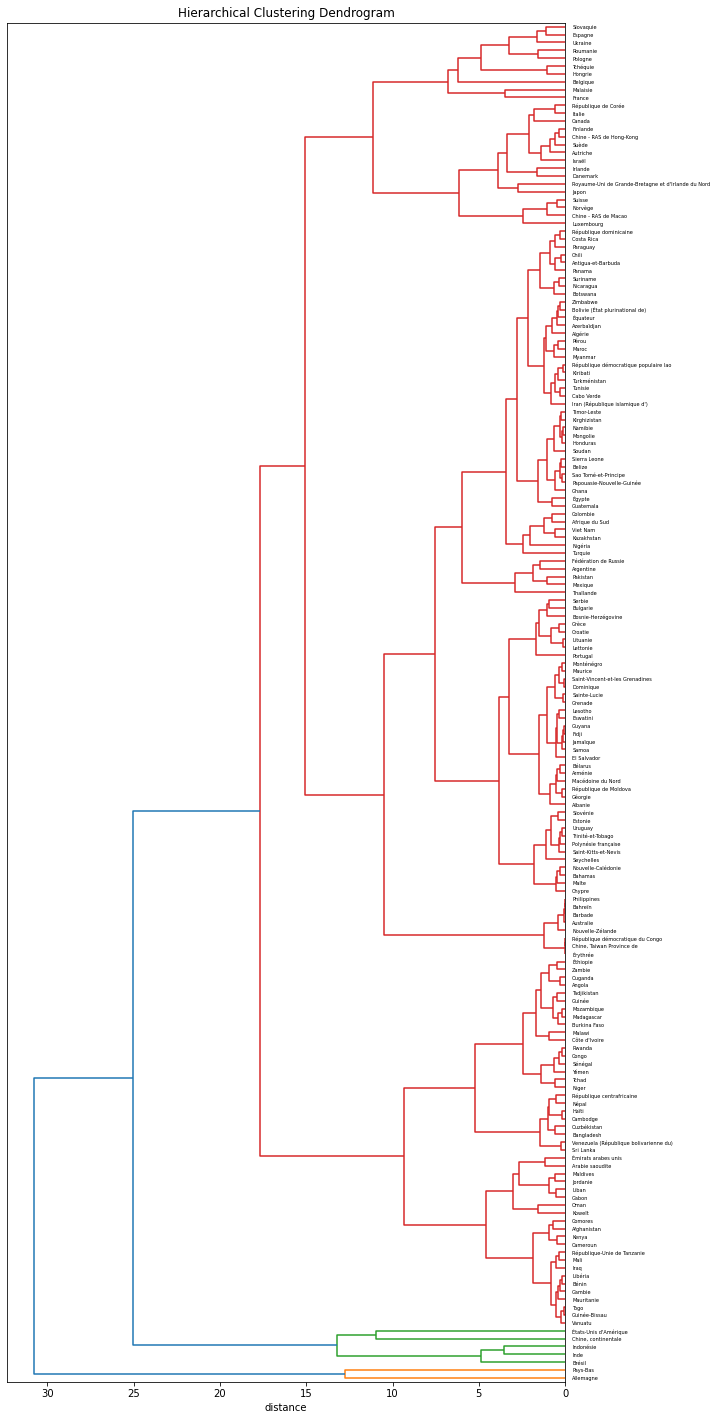

In [137]:
# Affichage du dendrogramme
plot_dendrogram(Z, names)

# 5 groupes de cluster

In [138]:
def plot_dendrogram_5(Z, names):
    plt.figure(figsize=(10,6))
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('distance')
    dendrogram(
        Z,
        truncate_mode='lastp',  # show only the last p merged clusters
        p=5,  # show only the last p merged clusters
        labels = names,
    )
    plt.show()

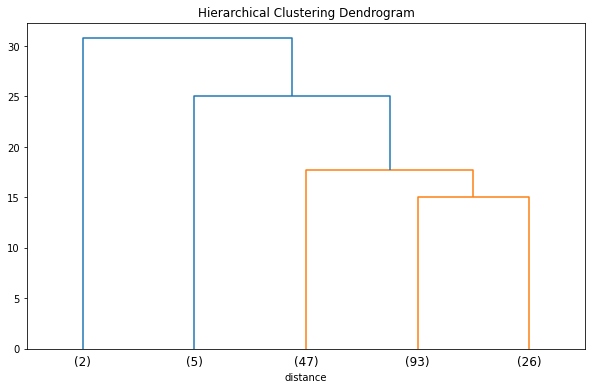

In [139]:
import matplotlib.pyplot as plt
plot_dendrogram_5(Z, names)

In [140]:
# Création df des clusters
k=5
clusters = pd.DataFrame(fcluster(Z, k, criterion='maxclust'))

In [141]:
# Renommage colonne
clusters.columns = ['clusters']

In [142]:
# Jointure externe de data_full & clusters
data_clusters= pd.concat([data_acp.reset_index(), clusters], axis=1)
data_clusters.set_index("Zone",inplace=True)
data_clusters.head(5)

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),ratio_evol_pop,ratio_protein_anim,pib_2018,pib_hab_2018,Importations Quantité 2018,Importations Valeur 2018 usd,Exportations Quantité 2018,Exportations Valeur 2018 usd,clusters
Zone,,,,,,,,,,,
Afghanistan,10467.902090,1377.139832,34.1,27.4,2.051388e+10,563.983834,12297000.0,9327000.0,0.0,0.0,3
Afrique du Sud,55805.974328,3412.061790,16.1,20.8,3.680939e+11,6412.962691,476000.0,8671000.0,6235000.0,9671000.0,4
Albanie,35070.201990,184.077685,-4.0,32.4,1.505888e+10,5131.908959,4700000.0,3829000.0,0.0,0.0,4
Algérie,35847.201990,1558.082864,21.6,30.2,1.737575e+11,4136.289853,5838000.0,26716000.0,0.0,0.0,4
Allemagne,94154.023284,3910.072148,2.5,24.5,3.949549e+12,47993.473332,164936000.0,185487000.0,312679000.0,680352000.0,1


In [143]:
# Nombre d'individus dans chaque cluster
data_clusters.groupby(["clusters"]).count()

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),ratio_evol_pop,ratio_protein_anim,pib_2018,pib_hab_2018,Importations Quantité 2018,Importations Valeur 2018 usd,Exportations Quantité 2018,Exportations Valeur 2018 usd
clusters,,,,,,,,,,
1,2,2,2,2,2,2,2,2,2,2
2,5,5,5,5,5,5,5,5,5,5
3,47,47,47,47,47,47,47,47,47,47
4,93,93,93,93,93,93,93,93,93,93
5,26,26,26,26,26,26,26,26,26,26


* correspond au tableau hierachique

# Centroide

In [144]:
# Valeurs moyennes par cluster
data_clusters.groupby(["clusters"]).mean()

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),ratio_evol_pop,ratio_protein_anim,pib_2018,pib_hab_2018,Importations Quantité 2018,Importations Valeur 2018 usd,Exportations Quantité 2018,Exportations Valeur 2018 usd
clusters,,,,,,,,,,
1,71962.181791,3079.469200,2.750000,24.400000,2.431827e+12,50749.262099,3.041470e+08,4.816465e+08,3.097285e+08,5.250245e+08
2,286161.597333,16524.498434,9.760000,5.700000,7.975703e+12,17483.712731,1.377800e+06,1.550340e+07,1.696540e+07,5.656580e+07
3,28520.774498,786.151386,31.678723,34.057238,6.712045e+10,4488.336069,1.725509e+06,4.270632e+06,1.005164e+06,1.636787e+06
4,43046.820224,707.344104,9.099791,21.661185,1.096687e+11,8175.322523,2.792698e+06,5.411230e+06,4.558941e+06,4.561629e+06
5,50540.426781,1576.609545,6.600000,24.253846,9.205677e+11,45328.775305,2.825123e+07,3.376946e+07,3.378158e+07,4.916206e+07


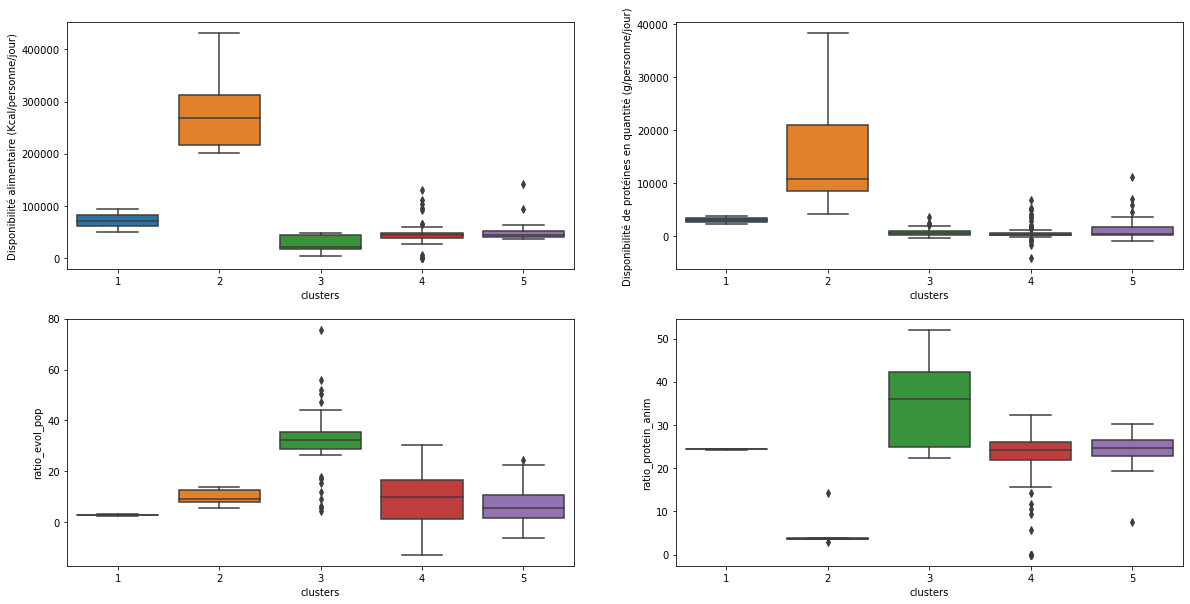

In [145]:
# Graphiques variables par clusters
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20, 10)
plt.subplot(221)
sns.boxplot(x=data_clusters["clusters"], y = data_clusters["Disponibilité alimentaire (Kcal/personne/jour)"])
plt.subplot(222)
sns.boxplot(x=data_clusters["clusters"], y = data_clusters["Disponibilité de protéines en quantité (g/personne/jour)"])
plt.subplot(223)
sns.boxplot(x=data_clusters["clusters"], y = data_clusters["ratio_evol_pop"])
plt.subplot(224)
sns.boxplot(x=data_clusters["clusters"], y = data_clusters["ratio_protein_anim"])
plt.show()

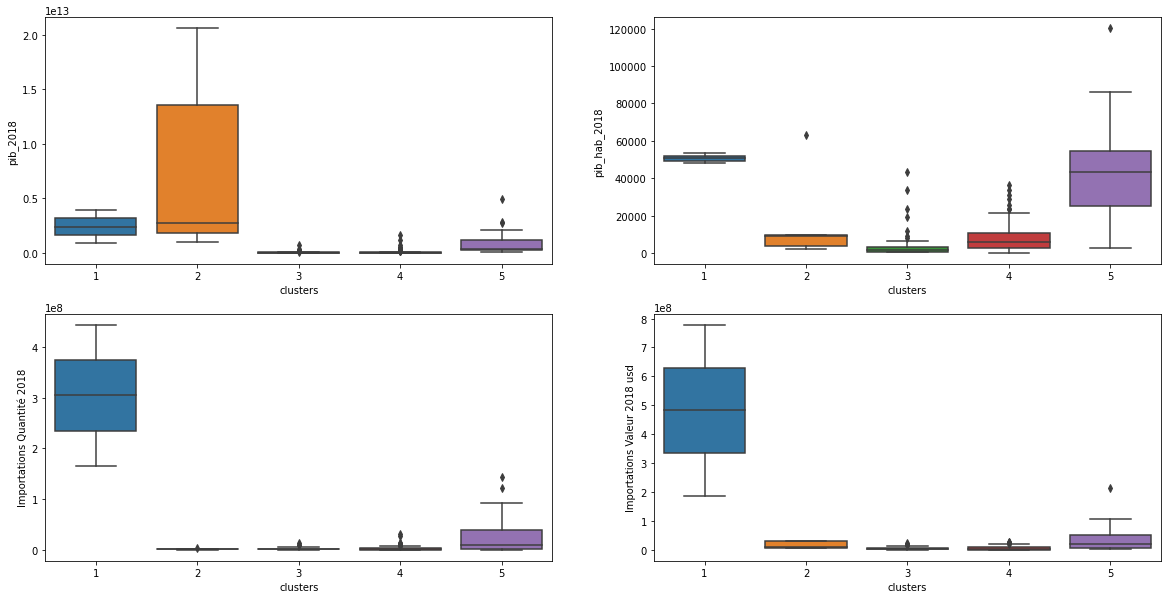

In [146]:
plt.subplot(221)
sns.boxplot(x=data_clusters["clusters"], y = data_clusters["pib_2018"])
plt.subplot(222)
sns.boxplot(x=data_clusters["clusters"], y = data_clusters["pib_hab_2018"])
plt.subplot(223)
sns.boxplot(x=data_clusters["clusters"], y = data_clusters["Importations Quantité 2018"])
plt.subplot(224)
sns.boxplot(x=data_clusters["clusters"], y = data_clusters["Importations Valeur 2018 usd"])
plt.show()

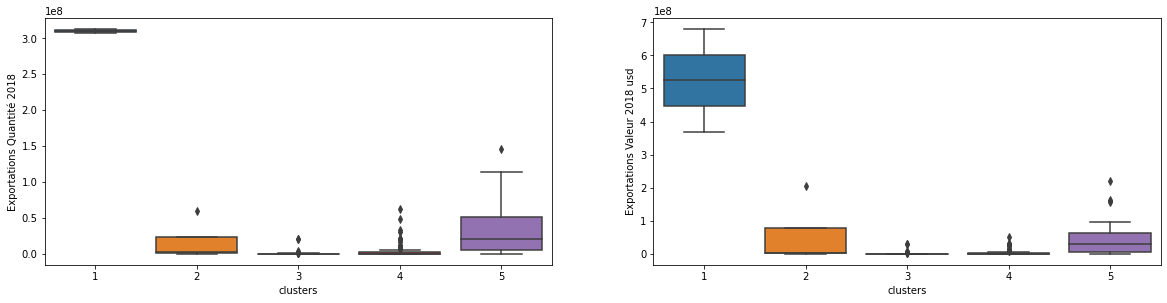

In [147]:
plt.subplot(221)
sns.boxplot(x=data_clusters["clusters"], y = data_clusters["Exportations Quantité 2018"])
plt.subplot(222)
sns.boxplot(x=data_clusters["clusters"], y = data_clusters["Exportations Valeur 2018 usd"])
plt.show()

In [148]:
# Localisation France
data_clusters.loc[data_clusters.index=="France"]

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),ratio_evol_pop,ratio_protein_anim,pib_2018,pib_hab_2018,Importations Quantité 2018,Importations Valeur 2018 usd,Exportations Quantité 2018,Exportations Valeur 2018 usd,clusters
Zone,,,,,,,,,,,
France,93271.478607,11235.062148,4.5,21.2,2.778892e+12,41168.651446,23907000.0,29312000.0,102459000.0,220354000.0,5


In [149]:
# nombre de pays dans clusters 4 
len(data_clusters.loc[data_clusters["clusters"]==4])

93

* 93 pays dans le cluster 4

# ACP

In [150]:
# calcul des composantes principales
acp = decomposition.PCA(n_components=nbr_comp)
acp.fit(X_scaled)

PCA(n_components=10)

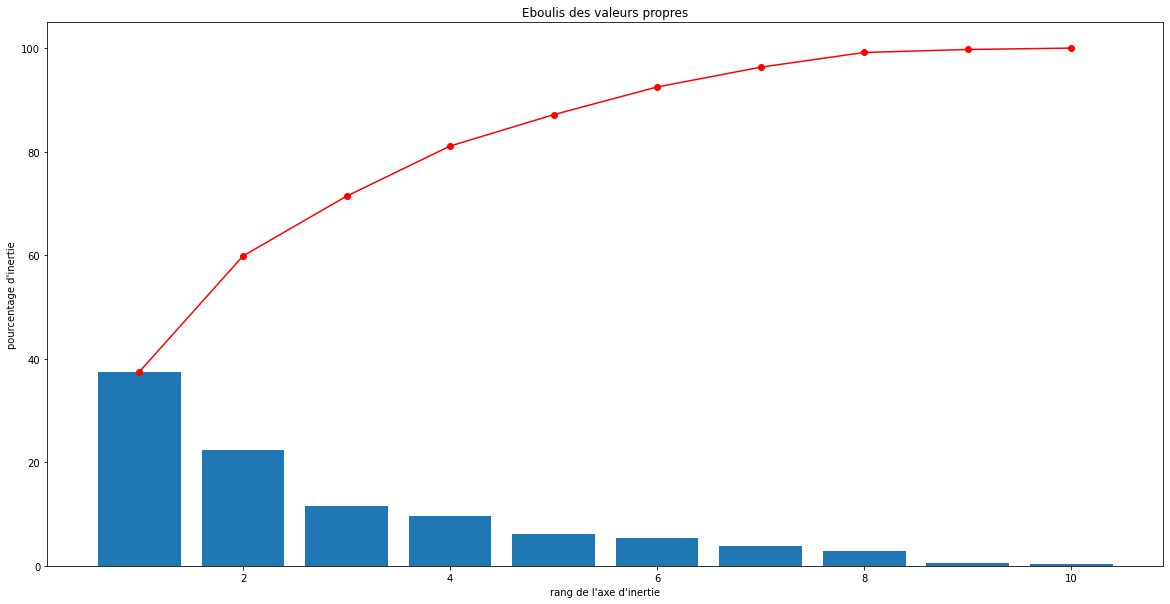

In [151]:
# Affichage des éboulis propre
display_scree_plot(acp)

In [152]:
# cercle des correlations
pcs = acp.components_

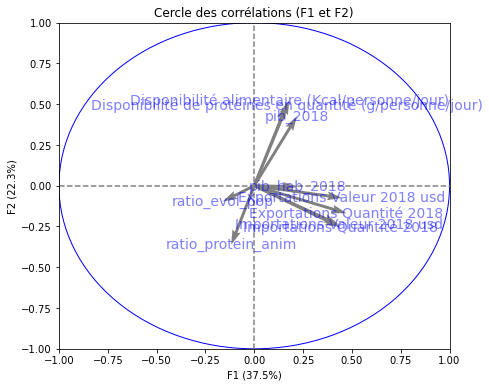

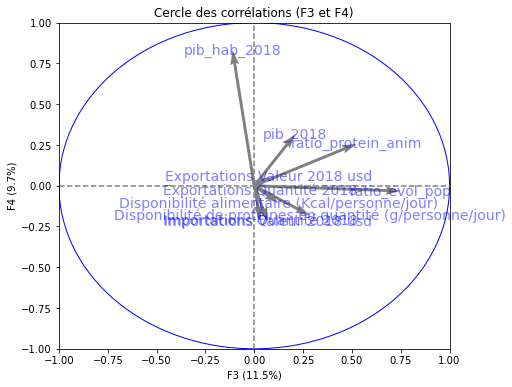

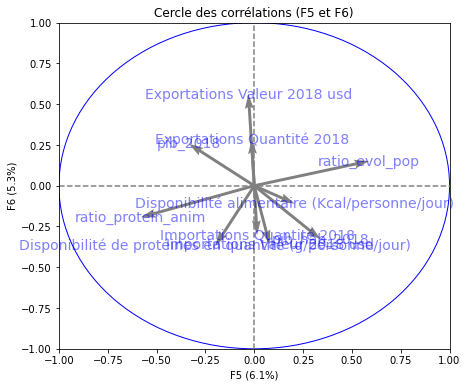

In [153]:
display_circles(pcs, nbr_comp, acp, [(0,1),(2,3),(4,5)], labels = np.array(features))

In [154]:
# composantes F1
# "Dispo alim","Dispo protein","Ratio pop","Ratio prot", "Pib", "Pib hab", "Imp", "Imp USD", "Exp", "Exp USD"
f1 = acp.components_[0]
for f in f1:
    print(f)

0.17981156394549816
0.16559384787355041
-0.16181507905269513
-0.11784619338836516
0.21905539330602514
0.21993952315321397
0.43925006151527013
0.43142670762645124
0.47235016149752873
0.44903416247577277


In [155]:
# composantes F2
# "Dispo alim","Dispo protein","Ratio pop","Ratio prot", "Pib", "Pib hab", "Imp", "Imp USD", "Exp", "Exp USD"
f2 = acp.components_[1]
for f in f2:
    print(f)

0.5257631299873434
0.49630579983287076
-0.0971532453747797
-0.36174700113494873
0.4266691887562058
-0.006433265367937724
-0.25334074275244106
-0.2381777285182508
-0.16849345034099356
-0.07460462208019913


In [156]:
# projection des individus 
X_projected = acp.transform(X_scaled)

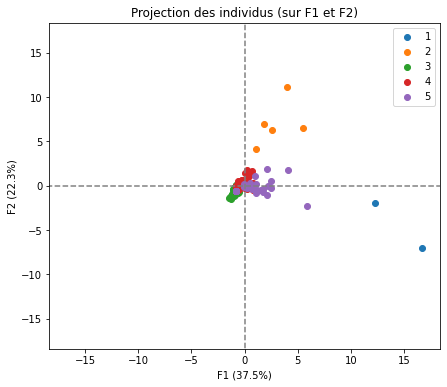

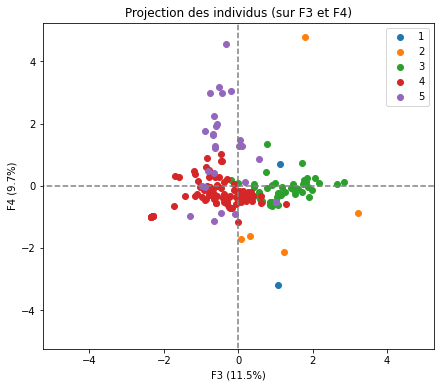

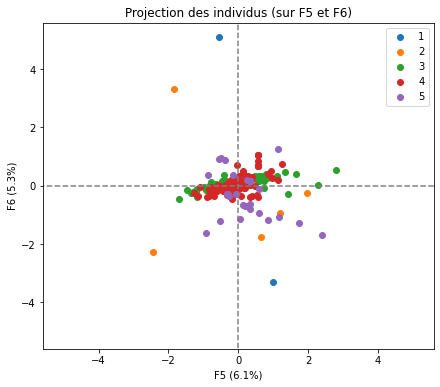

In [157]:
display_factorial_planes(X_projected, nbr_comp, acp, [(0,1),(2,3),(4,5)], labels=None, illustrative_var=clusters)

In [158]:
data_clusters.loc[data_clusters["clusters"]==1]

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),ratio_evol_pop,ratio_protein_anim,pib_2018,pib_hab_2018,Importations Quantité 2018,Importations Valeur 2018 usd,Exportations Quantité 2018,Exportations Valeur 2018 usd,clusters
Zone,,,,,,,,,,,
Allemagne,94154.023284,3910.072148,2.5,24.5,3.949549e+12,47993.473332,164936000.0,185487000.0,312679000.0,680352000.0,1
Pays-Bas,49770.340299,2248.866253,3.0,24.3,9.141048e+11,53505.050866,443358000.0,777806000.0,306778000.0,369697000.0,1


In [159]:
data_clusters.loc[data_clusters["clusters"]==2]

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),ratio_evol_pop,ratio_protein_anim,pib_2018,pib_hab_2018,Importations Quantité 2018,Importations Valeur 2018 usd,Exportations Quantité 2018,Exportations Valeur 2018 usd,clusters
Zone,,,,,,,,,,,
Brésil,430792.746667,8553.077685,9.1,2.9,1.868613e+12,8861.531858,100000.0,3760000.0,22906000.0,76836000.0,2
"Chine, continentale",269052.982886,38205.097685,5.5,3.9,1.360815e+13,9616.756315,1329000.0,28613000.0,2404000.0,969000.0,2
Inde,312622.527562,20941.192506,12.7,3.7,2.779352e+12,2052.618239,160000.0,4044000.0,237000.0,733000.0,2
Indonésie,217007.933930,10784.062148,13.7,3.7,1.042173e+12,3906.270285,1277000.0,31079000.0,63000.0,67000.0,2
États-Unis d'Amérique,201331.795622,4139.062148,7.8,14.3,2.058022e+13,62981.386956,4023000.0,10021000.0,59217000.0,204224000.0,2


* composante =/ variable

* Effet de taille : 
 * pourquoi y a til des outlier a cette endroit ? 

* regarder les proportions des outliers

* trouver le meilleur cluster et ensuite le meilleur candidat
 * trouver les bonnes justifications 

* mardi 9/2 90h00

In [160]:
# Obtention F1 & F2
data_fn = pd.DataFrame(X_projected, index=data_clusters.index,columns=["F"+str(i+1) for i in range(10)])
data_fn = data_fn.reset_index()
data_fn = data_fn[["Zone","F1", "F2"]]

In [161]:
data_fn.loc[data_fn['Zone']=="Allemagne"]

,Zone,F1,F2
4,Allemagne,12.275737,-1.999842


In [162]:
data_fn.loc[data_fn['Zone']=="Pays-Bas"]

,Zone,F1,F2
112,Pays-Bas,16.707187,-7.002561


In [163]:
# merge data_clusters & data_fn
data_clusters = pd.merge(data_clusters,data_fn, left_on="Zone", right_on="Zone")
data_clusters.head(5)

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),ratio_evol_pop,ratio_protein_anim,pib_2018,pib_hab_2018,Importations Quantité 2018,Importations Valeur 2018 usd,Exportations Quantité 2018,Exportations Valeur 2018 usd,clusters,F1,F2
0,Afghanistan,10467.902090,1377.139832,34.1,27.4,2.051388e+10,563.983834,12297000.0,9327000.0,0.0,0.0,3,-0.857402,-0.634882
1,Afrique du Sud,55805.974328,3412.061790,16.1,20.8,3.680939e+11,6412.962691,476000.0,8671000.0,6235000.0,9671000.0,4,-0.205595,0.609312
2,Albanie,35070.201990,184.077685,-4.0,32.4,1.505888e+10,5131.908959,4700000.0,3829000.0,0.0,0.0,4,-0.523622,-0.387815
3,Algérie,35847.201990,1558.082864,21.6,30.2,1.737575e+11,4136.289853,5838000.0,26716000.0,0.0,0.0,4,-0.543897,-0.344852
4,Allemagne,94154.023284,3910.072148,2.5,24.5,3.949549e+12,47993.473332,164936000.0,185487000.0,312679000.0,680352000.0,1,12.275737,-1.999842


In [164]:
data_clusters.loc[data_clusters['clusters']==1]

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),ratio_evol_pop,ratio_protein_anim,pib_2018,pib_hab_2018,Importations Quantité 2018,Importations Valeur 2018 usd,Exportations Quantité 2018,Exportations Valeur 2018 usd,clusters,F1,F2
4,Allemagne,94154.023284,3910.072148,2.5,24.5,3.949549e+12,47993.473332,164936000.0,185487000.0,312679000.0,680352000.0,1,12.275737,-1.999842
112,Pays-Bas,49770.340299,2248.866253,3.0,24.3,9.141048e+11,53505.050866,443358000.0,777806000.0,306778000.0,369697000.0,1,16.707187,-7.002561


In [165]:
# Création df centroid pour les clusters
cluster_cent = pd.DataFrame(data_clusters.groupby(["clusters" ]).mean())
cluster_cent = cluster_cent.reset_index()
cluster_cent.head(10)

,clusters,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),ratio_evol_pop,ratio_protein_anim,pib_2018,pib_hab_2018,Importations Quantité 2018,Importations Valeur 2018 usd,Exportations Quantité 2018,Exportations Valeur 2018 usd,F1,F2
0,1,71962.181791,3079.469200,2.750000,24.400000,2.431827e+12,50749.262099,3.041470e+08,4.816465e+08,3.097285e+08,5.250245e+08,14.491462,-4.501201
1,2,286161.597333,16524.498434,9.760000,5.700000,7.975703e+12,17483.712731,1.377800e+06,1.550340e+07,1.696540e+07,5.656580e+07,2.973907,7.001141
2,3,28520.774498,786.151386,31.678723,34.057238,6.712045e+10,4488.336069,1.725509e+06,4.270632e+06,1.005164e+06,1.636787e+06,-0.948087,-0.656417
3,4,43046.820224,707.344104,9.099791,21.661185,1.096687e+11,8175.322523,2.792698e+06,5.411230e+06,4.558941e+06,4.561629e+06,-0.367216,0.076449
4,5,50540.426781,1576.609545,6.600000,24.253846,9.205677e+11,45328.775305,2.825123e+07,3.376946e+07,3.378158e+07,4.916206e+07,1.340718,-0.086977


In [166]:
# Conservation F1 & F2
cluster_cent = cluster_cent[["clusters","F1","F2"]]
cluster_cent.head(10)

,clusters,F1,F2
0,1,14.491462,-4.501201
1,2,2.973907,7.001141
2,3,-0.948087,-0.656417
3,4,-0.367216,0.076449
4,5,1.340718,-0.086977


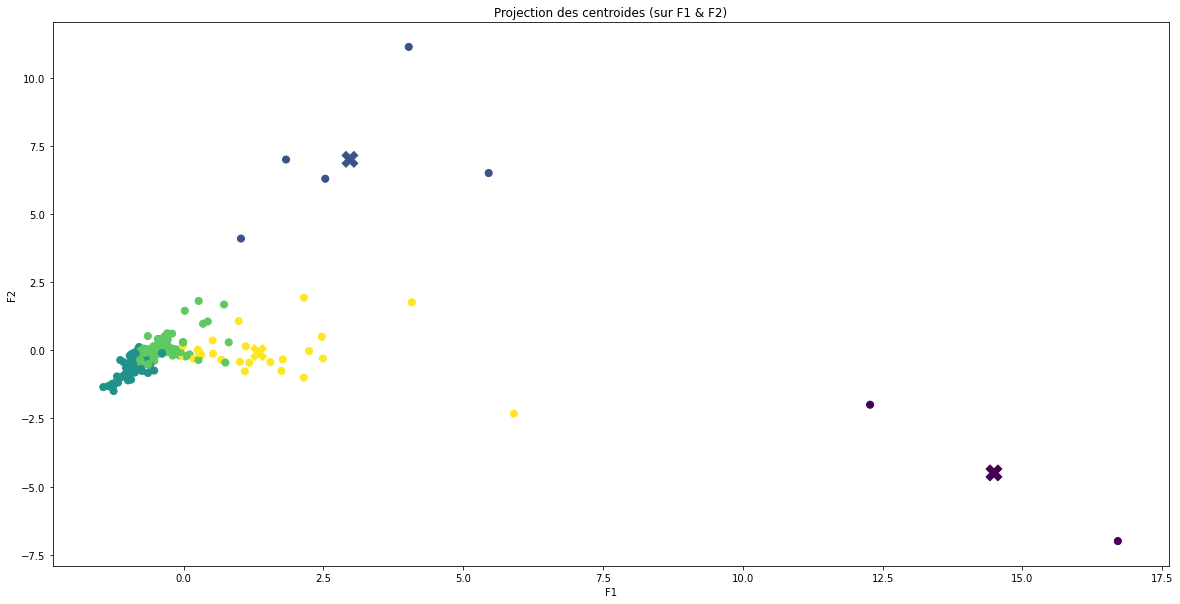

In [167]:
plt.scatter(x=cluster_cent["F1"], y=cluster_cent["F2"], c=cluster_cent["clusters"], s=250, marker="X")
plt.scatter(x=data_clusters["F1"], y=data_clusters["F2"], c=data_clusters["clusters"], s=50)
plt.title("Projection des centroides (sur F1 & F2)")
plt.xlabel("F1")
plt.ylabel("F2")
plt.show()

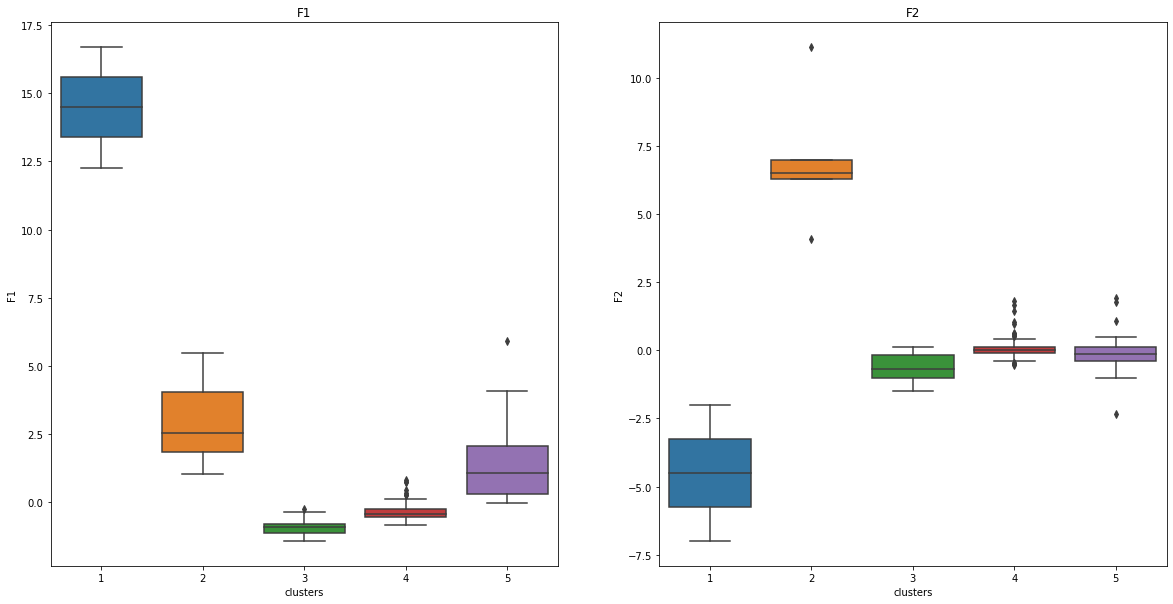

In [168]:
# boxplot F1 & F2
plt.subplot(121)
sns.boxplot( x=data_clusters["clusters"], y=data_clusters["F1"])
plt.title("F1")

plt.subplot(122)
sns.boxplot( x=data_clusters["clusters"], y=data_clusters["F2"])
plt.title("F2")
plt.show()

In [169]:
data_clusters.loc[data_clusters['clusters']].describe()

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),ratio_evol_pop,ratio_protein_anim,pib_2018,pib_hab_2018,Importations Quantité 2018,Importations Valeur 2018 usd,Exportations Quantité 2018,Exportations Valeur 2018 usd,clusters,F1,F2
count,173.000000,173.000000,173.000000,173.000000,1.730000e+02,173.000000,1.730000e+02,1.730000e+02,1.730000e+02,1.730000e+02,173.000000,173.000000,173.000000
mean,64832.554686,2648.622397,13.594798,28.142775,2.190980e+12,27663.335993,9.067765e+07,1.075185e+08,1.681596e+08,3.658502e+08,2.236994,6.254657,-1.317373
std,32278.764124,1432.355546,14.666523,4.678205,1.901981e+12,21987.004606,8.030777e+07,8.469118e+07,1.562735e+08,3.400795e+08,1.375202,6.514269,0.773136
min,18766.397811,184.077685,-4.000000,20.800000,1.505888e+10,3441.269755,4.760000e+05,2.241000e+06,0.000000e+00,0.000000e+00,1.000000,-1.192135,-1.999842
25%,35847.201990,1558.082864,2.500000,24.500000,1.737575e+11,4136.289853,5.838000e+06,2.671600e+07,0.000000e+00,0.000000e+00,1.000000,-0.543897,-1.999842
50%,94154.023284,3910.072148,2.500000,24.500000,3.949549e+12,47993.473332,1.649360e+08,1.854870e+08,3.126790e+08,6.803520e+08,1.000000,12.275737,-1.999842
75%,94154.023284,3910.072148,21.600000,30.200000,3.949549e+12,47993.473332,1.649360e+08,1.854870e+08,3.126790e+08,6.803520e+08,4.000000,12.275737,-0.344852
max,94154.023284,3910.072148,42.000000,37.200000,3.949549e+12,47993.473332,1.649360e+08,1.854870e+08,3.126790e+08,6.803520e+08,4.000000,12.275737,0.609312


### KS

In [170]:
print("1/pvalue Disponibilité alimentaire (Kcal/personne/jour)")
print(ks_2samp(data_clusters["Disponibilité alimentaire (Kcal/personne/jour)"],list(np.random.normal(np.mean(data_clusters["Disponibilité alimentaire (Kcal/personne/jour)"]), np.std(data_clusters["Disponibilité alimentaire (Kcal/personne/jour)"]), 1000))))
print("2/pvalue Disponibilité de protéines en quantité (g/personne/jour)")
print(ks_2samp(data_clusters["Disponibilité de protéines en quantité (g/personne/jour)"],list(np.random.normal(np.mean(data_clusters["Disponibilité de protéines en quantité (g/personne/jour)"]), np.std(data_clusters["Disponibilité de protéines en quantité (g/personne/jour)"]), 1000))))
print("3/pvalue ratio_protein_anim")
print(ks_2samp(data_clusters["ratio_protein_anim"],list(np.random.normal(np.mean(data_clusters["ratio_protein_anim"]), np.std(data_clusters["ratio_protein_anim"]), 1000))))
print("4/pvalue Exportations Valeur 2018 usd")
print(ks_2samp(data_clusters["Exportations Valeur 2018 usd"],list(np.random.normal(np.mean(data_clusters["Exportations Valeur 2018 usd"]), np.std(data_clusters["Exportations Valeur 2018 usd"]), 1000))))

1/pvalue Disponibilité alimentaire (Kcal/personne/jour)
KstestResult(statistic=0.3351734104046243, pvalue=3.6637359812630166e-15)
2/pvalue Disponibilité de protéines en quantité (g/personne/jour)
KstestResult(statistic=0.31822543352601157, pvalue=9.459100169806334e-14)
3/pvalue ratio_protein_anim
KstestResult(statistic=0.21393063583815028, pvalue=2.1071159421737207e-06)
4/pvalue Exportations Valeur 2018 usd
KstestResult(statistic=0.387, pvalue=2.5069461912369694e-20)


### Shapiro Wilk

In [171]:
print("1/pvalue Disponibilité alimentaire (Kcal/personne/jour)")
print(stats.shapiro(data_clusters["Disponibilité alimentaire (Kcal/personne/jour)"]))
print("2/pvalue Disponibilité de protéines en quantité (g/personne/jour)")
print(stats.shapiro(data_clusters["Disponibilité de protéines en quantité (g/personne/jour)"]))
print("3/pvalue ratio_protein_anim")
print(stats.shapiro(data_clusters["ratio_protein_anim"]))
print("4/pvalue Exportations Valeur 2018 usd")
print(stats.shapiro(data_clusters["Exportations Valeur 2018 usd"]))

1/pvalue Disponibilité alimentaire (Kcal/personne/jour)
ShapiroResult(statistic=0.4979633092880249, pvalue=5.33151125300867e-22)
2/pvalue Disponibilité de protéines en quantité (g/personne/jour)
ShapiroResult(statistic=0.39040714502334595, pvalue=6.640665021169402e-24)
3/pvalue ratio_protein_anim
ShapiroResult(statistic=0.881175696849823, pvalue=1.7025522658364878e-10)
4/pvalue Exportations Valeur 2018 usd
ShapiroResult(statistic=0.2828073501586914, pvalue=1.4528744649104503e-25)


In [172]:
len(data_clusters.loc[data_clusters["clusters"]==1])

2

In [173]:
len(data_clusters.loc[data_clusters["clusters"]==2])

5

### Conservation données complètes cluster_1 & cluster_2

In [174]:
cluster_1 = data_clusters[data_clusters["clusters"]==1]
cluster_full_1 = cluster_1.copy()
cluster_2 = data_clusters[data_clusters["clusters"]==2]
cluster_full_2 = cluster_2.copy()

In [175]:
cluster_1.sort_values(["F1"], axis=0, ascending=False, inplace=True)
print(len(cluster_1))
cluster_1["Zone"]

2


C:\Users\Theo Chastre Pradat\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


112     Pays-Bas
4      Allemagne
Name: Zone, dtype: object

In [176]:
cluster_2.sort_values(["F1"], axis=0, ascending=False, inplace=True)
print(len(cluster_2))
cluster_2["Zone"]

5


C:\Users\Theo Chastre Pradat\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


163    États-Unis d'Amérique
31       Chine, continentale
19                    Brésil
62                      Inde
63                 Indonésie
Name: Zone, dtype: object

In [177]:
cluster_dispo_kcal_1 = cluster_1["Disponibilité alimentaire (Kcal/personne/jour)"]

In [178]:
cluster_dispo_kcal_2 = cluster_2["Disponibilité alimentaire (Kcal/personne/jour)"]

In [179]:
# test egalite des variances
sp.stats.bartlett(cluster_dispo_kcal_1,cluster_dispo_kcal_2)

BartlettResult(statistic=0.8737005263527234, pvalue=0.34993287957912333)

#### on ne rejette pas l'egalite des variances au niveau de test 5% car pvalue > 5%

In [180]:
# test egalite des moyennes
sp.stats.ttest_ind(cluster_dispo_kcal_1,cluster_dispo_kcal_2, equal_var=True)

Ttest_indResult(statistic=-3.065499830402198, pvalue=0.027926501606787002)

#### on rejette l'egalite des moyennes au niveau de test 5% car pvalue < 5%